In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hdc\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hdc\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hdc\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

In [2]:
def normalize(X):
    """
        Normalize the array X
    """
    mean = np.mean(X)
    std = np.std(X)
    X = (X - mean) / std
    return X

In [3]:
# Data 
boston = tf.contrib.learn.datasets.load_dataset('boston')
X_train, Y_train = boston.data, boston.target
print('X_train: ', X_train, 'X_train\'s shape: ', X_train.shape, '\nY_train: ', Y_train, 'Y_train\'s shape: ', Y_train.shape)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use tf.data.
Instructions for updating:
Use scikits.learn.datasets.
Instructions for updating:
Use tf.data instead.
X_train:  [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] X_train's shape:  (506, 13) 
Y_t

In [4]:
# 加上一条偏置项bias， Y = x_0 + a1*x_1 + a2_x2 +...+an*x_n
def append_bias_reshape(features, labels):
    m = features.shape[0]
    n = features.shape[1]
#     print(np.c_[np.ones(m), features], np.c_[np.ones(m), features].shape)
    x = np.reshape(np.c_[np.ones(m), features], [m, n+1])
    y = np.reshape(labels, [m, 1])
    return x, y

In [5]:
X_train = normalize(X_train)
X_train, Y_train = append_bias_reshape(X_train, Y_train)
print('X_train: ', X_train, 'X_train\'s shape: ', X_train.shape, '\nY_train: ', Y_train, 'Y_train\'s shape: ', Y_train.shape)

X_train:  [[ 1.         -0.48269464 -0.35873385 ... -0.3773345   2.25155745
  -0.44843032]
 [ 1.         -0.48255004 -0.48273818 ... -0.36011167  2.25155745
  -0.41977154]
 [ 1.         -0.48255018 -0.48273818 ... -0.36011167  2.22351869
  -0.45497499]
 ...
 [ 1.         -0.4823196  -0.48273818 ... -0.33806646  2.25155745
  -0.44388349]
 [ 1.         -0.4819832  -0.48273818 ... -0.33806646  2.22778995
  -0.43809662]
 [ 1.         -0.48241157 -0.48273818 ... -0.33806646  2.25155745
  -0.42845184]] X_train's shape:  (506, 14) 
Y_train:  [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [3

In [6]:
dataset_len = X_train.shape[0]
feature_num = X_train.shape[1]

In [7]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

w = tf.Variable(tf.random_normal([feature_num, 1]))

In [8]:
Y_hat = tf.matmul(X, w)

loss = tf.reduce_mean(tf.square(Y - Y_hat), name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
tf.summary.scalar('loss', loss)

<tf.Tensor 'loss_1:0' shape=() dtype=string>

In [9]:
init = tf.global_variables_initializer()
total = []

In [10]:
with tf.Session() as sess:
    sess.run(init)
    merge_summary_op = tf.summary.merge_all()
    writer = tf.summary.FileWriter('log/multi_linear_regression', sess.graph)
    
    for i in range(100):
        _, l, summary_str = sess.run([optimizer, loss, merge_summary_op], feed_dict={X: X_train, Y: Y_train})
        total.append(l)
        print('Epoch {0}: Loss {1}'.format(i, l))
        writer.add_summary(summary_str, i)
    writer.close()
    w_val = sess.run(w)

Epoch 0: Loss 343.48480224609375
Epoch 1: Loss 252.8187713623047
Epoch 2: Loss 200.94223022460938
Epoch 3: Loss 170.74110412597656
Epoch 4: Loss 152.67674255371094
Epoch 5: Loss 141.4315643310547
Epoch 6: Loss 134.04000854492188
Epoch 7: Loss 128.84727478027344
Epoch 8: Loss 124.92881774902344
Epoch 9: Loss 121.76728057861328
Epoch 10: Loss 119.07218933105469
Epoch 11: Loss 116.67960357666016
Epoch 12: Loss 114.49624633789062
Epoch 13: Loss 112.4681625366211
Epoch 14: Loss 110.56360626220703
Epoch 15: Loss 108.7630615234375
Epoch 16: Loss 107.05408477783203
Epoch 17: Loss 105.42814636230469
Epoch 18: Loss 103.87898254394531
Epoch 19: Loss 102.40174865722656
Epoch 20: Loss 100.99236297607422
Epoch 21: Loss 99.6472396850586
Epoch 22: Loss 98.3631591796875
Epoch 23: Loss 97.13716125488281
Epoch 24: Loss 95.96647644042969
Epoch 25: Loss 94.84849548339844
Epoch 26: Loss 93.78073120117188
Epoch 27: Loss 92.76087188720703
Epoch 28: Loss 91.78665924072266
Epoch 29: Loss 90.85597229003906
Epoch

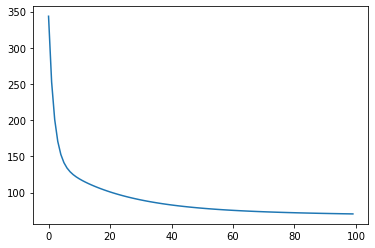

In [11]:
plt.plot(total)
plt.show()